# PREVISÃO DE APOSENTADORIA UFTM

### Autor

TIAGO TOUSO

#### **Descrição do projeto de machine learning**

Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  

Prever o número de egresso de servidores por aposentadoria com base nos dados dos servidores Ativos e Inativos.

**2- Descrição da solução de IA:** 

Treinamento supervisionado de modelo de classificação com base nos dados do servidores Ativos e Inativos para prever se o servidor tem as requisitos para se aposentar.  

**3- Fonte de dados:**

Os dados foram obtidos do Extrator de Dados (SIAPE, sistema on-line, de abrangência nacional, que constitui-se hoje na principal ferramenta para a gestão do pessoal civil do Governo Federal) 

**4- Variáveis independentes (preditoras ou "features"):**  

'IDADE', 'SEXO', 'ESTADO CIVIL','TITULAÇÃO', 'TEMPO SERVIÇO', 'CARREIRA', 'CARGO', 'CLASSE', 'CD CLASSE', 'CD REFERÊNCIA', 'CD PADRÃO', 'CD NÍVEL', 'LOTAÇÃO', 'EXERCÍCIO', 'GRUPO', 'UPAG', 'CH', 'DT INGRESSO ÓRGÃO SP', 'DT INATIVIDADE', 'DT EXCLUSÃO'    
       
**5- Variável dependente (resposta ou "target"):**  

'REG JUR' (Regime Jurídico), ser o servidor tem os requisitos para aposentar ou não

# IMPORTANDO OS MÓDULOS

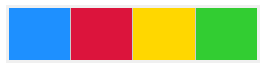

In [1]:
# IMPORTAÇÃO DO MÓDULOS PARA ANÁLISE E GRÁGICOS

import pandas as pd
import numpy as np


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sn
from pywaffle import Waffle

# sn.set(style="whitegrid")
plt.style.use('fivethirtyeight')
my_color_palette = ["#1E90FF","#DC143C","#FFD700","#32CD32"]
sn.set_palette(my_color_palette)

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = [16, 5]
rcParams['font.size'] = 12

sn.palplot(sn.color_palette(my_color_palette))

### FUNÇÕES

In [2]:
num = 0
def salvargraficos():
    global num 
    num += 1
    fig.savefig('_GRÁFICOS/GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

# FORMATO PADRÃO PARA A IMPORTAÇÃO DOS DADOS

In [3]:
""" 
Para utilizar o  modelo

Os dados deverão ser importados no formato “.csv”, uft-16, separados por tab (Esta configuração poderá ser alterada no código)

O arquivo “.csv” deverá ter o “Nome das colunas”, “Tipo dos dados” e “Formato” conforme tabela baixo. (Também é possível 
alterar este padrão, mas também deverá ser alterado no código)

"""
descricao = pd.read_excel("_DESCRIÇÃO DOS DADOS.xls")
descricao

,CAMPO,TIPO,TAMANHO,FORMATO,DESCRIÇÃO,CAMPO USADO NA PREVISÃO
0,IDADE,NUMERO,-,1-100,IDADE DO SERVIDOR,SIM
1,SEXO,CHAR,1,X,SEXO DO SERVIDOR,SIM
2,ESTADO CIVIL,TEXTO,22,A-Z,ESTADO CIVIL DO SERVIDOR,SIM
3,TITULAÇÃO,TEXTO,19,A-Z,TITULAÇÃO DO SERVIDOR,SIM
4,REG JUR,TEXTO,34,A-Z,REGIME JURÍDICO DO CARGO,SIM
5,TEMPO SERVIÇO,NUMERO,-,1-100,TEMPO DE SERVIÇO DO SERVIDOR NO CARGO,SIM
6,CARREIRA,TEXTO,8,A-Z,CARREIRA DO SERVIDOR,SIM
7,CARGO,TEXTO,42,A-Z,CARGO DO SERVIDOR,SIM
8,CLASSE,TEXTO,10,A-Z,CLASSE DO CARGO DO SERVIDOR,SIM
9,CD CLASSE,CHAR,-,X,CÓDIGO DA CLASSE DO SERVIDOR,SIM


# IMPORTANDO OS DADOS

In [4]:
# DESCRIÇÃO PADRÃO DAS COLUNAS

colunas = ['IDADE', 'SEXO', 'ESTADO CIVIL', 'TITULAÇÃO', 'REG JUR',
       'TEMPO SERVIÇO', 'CARREIRA', 'CARGO', 'CLASSE', 'CD CLASSE',
       'CD REFERÊNCIA', 'CD PADRÃO', 'CD NÍVEL', 'LOTAÇÃO', 'EXERCÍCIO',
       'GRUPO', 'UPAG', 'CH', 'DT INGRESSO ÓRGÃO SP', 'DT INATIVIDADE',
       'DT EXCLUSÃO']

dados = pd.read_csv('DADOS/2020-07-01 SERVIDORES_ATIVOS_APOSENTADOS.csv', sep='\t', encoding='utf-16')

# ANÁLISE DOS DADOS

In [5]:
# TAMANHDO DO DATASET

dados.shape

(2963, 21)

In [6]:
# VERIFICAÇÃO DOS DADOS DO DATASET

dados.sample(5)

,IDADE,SEXO,ESTADO CIVIL,TITULAÇÃO,REG JUR,TEMPO SERVIÇO,CARREIRA,CARGO,CLASSE,CD CLASSE,...,CD PADRÃO,CD NÍVEL,LOTAÇÃO,EXERCÍCIO,GRUPO,UPAG,CH,DT INGRESSO ÓRGÃO SP,DT INATIVIDADE,DT EXCLUSÃO
1356,42,F,CASADO,DOUTORADO,ATIVO PERMANENTE,7,PROF 3º,PROF. 3º,ADJUNTO,6,...,NaN,604,"INSTITUTO DE CIÊNCIAS EXATAS, NATURAIS E DA ED...",V.N.O. (PROF 3º),ICENE,UFTM,40 DE,2013-02-22,NaN,NaN
262,49,F,DIVORCIADO,SUPERIOR,ATIVO PERMANENTE,26,TÉCN,ENFERMEIRO,E,E,...,416,0,HOSP-DIRETORIA DE ENFERMAGEM,V.N.O. (HC),HC,HC,40,1995-01-26,NaN,NaN
1506,37,M,DIVORCIADO,SUPERIOR,ATIVO PERMANENTE,6,TÉCN,TÉCNICO EM MÓVEIS E ESQUADRIAS,D,D,...,305,0,DEPARTAMENTO DE ENGENHARIA E MANUTENÇÃO,DIVISÃO DE OBRAS E MANUTENÇÃO PREDIAL,PREFEITURA,UFTM,40,2014-04-01,NaN,NaN
2933,69,F,CASADO,SUPERIOR,APOSENTADO,25,TÉCN,ENFERMEIRO,E,E,...,110,0,HOSP-SUPERINTENDÊNCIA DO HOSPITAL-ESCOLA,V.N.O. (HC),HC,HC,40,1995-04-11,2001-02-15,NaN
2248,73,F,SOLTEIRO,MEDIO,APOSENTADO,39,TÉCN,TÉCNICO EM ENFERMAGEM,D,D,...,106,0,NaN,NaN,NaN,NaN,40,1982-01-04,1992-05-26,NaN


In [7]:
# ANÁLISE ESTATÍSTICA PRELIMINAR

dados.describe()

,IDADE,TEMPO SERVIÇO,CD REFERÊNCIA,CD NÍVEL,DT EXCLUSÃO
count,2963.000000,2963.000000,2963.0,2963.000000,0.0
mean,52.669254,19.392845,0.0,150.192035,NaN
std,13.715616,13.199256,0.0,270.284812,NaN
min,23.000000,0.000000,0.0,0.000000,NaN
25%,41.000000,8.000000,0.0,0.000000,NaN
50%,53.000000,17.000000,0.0,0.000000,NaN
75%,63.000000,29.000000,0.0,0.000000,NaN
max,94.000000,69.000000,0.0,801.000000,NaN


In [8]:
# ANÁLISE DOS COLUNAS

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDADE                 2963 non-null   int64  
 1   SEXO                  2963 non-null   object 
 2   ESTADO CIVIL          2963 non-null   object 
 3   TITULAÇÃO             2963 non-null   object 
 4   REG JUR               2963 non-null   object 
 5   TEMPO SERVIÇO         2963 non-null   int64  
 6   CARREIRA              2963 non-null   object 
 7   CARGO                 2963 non-null   object 
 8   CLASSE                2959 non-null   object 
 9   CD CLASSE             2963 non-null   object 
 10  CD REFERÊNCIA         2963 non-null   int64  
 11  CD PADRÃO             2247 non-null   object 
 12  CD NÍVEL              2963 non-null   int64  
 13  LOTAÇÃO               2636 non-null   object 
 14  EXERCÍCIO             2747 non-null   object 
 15  GRUPO                

<AxesSubplot:>

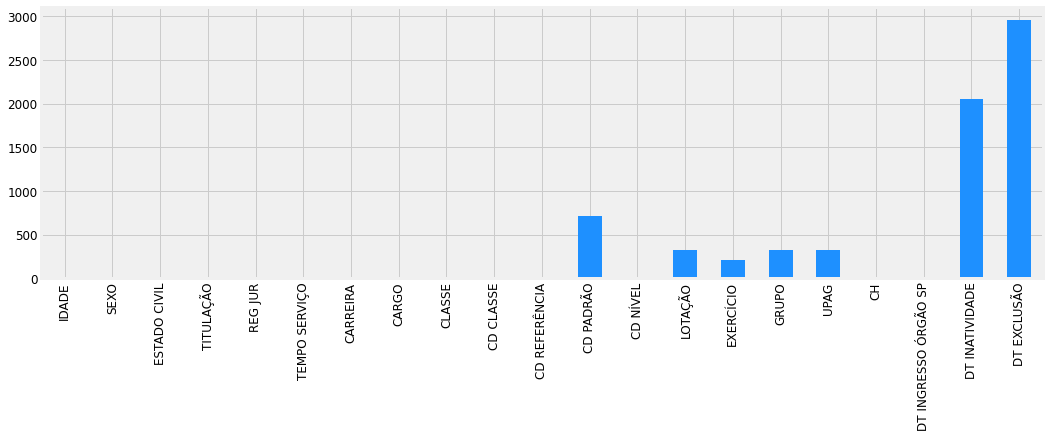

In [9]:
# ANÁLISE DA BASE DE DADOS TOTAL PARA VERIFICAR SE TEM DADOS FALTANDO

dados.isnull().sum().plot(kind='bar')

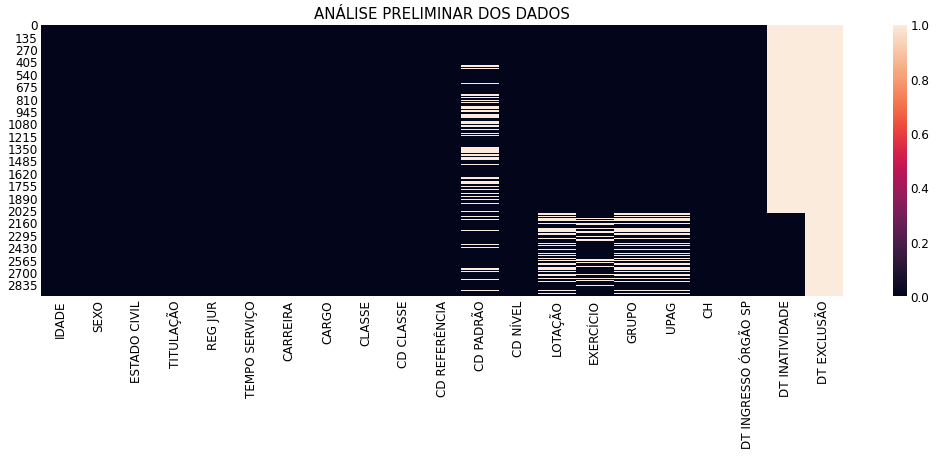

In [10]:
# ANÁLISE DA BASE DE DADOS TOTAL PARA VERIFICAR SE TEM DADOS FALTANDO

fig, ax = plt.subplots()
ax = sn.heatmap(dados.isnull(), )
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('ANÁLISE PRELIMINAR DOS DADOS', fontsize=15)

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* O campo 'DT INATIVIDADE' aparentemente separa os dois grupos ativos e inativos
* Sendo esse grupo dos servidores Inativos, justifica a falta de dados lotação dos servidores
* O campo ‘CD PADRÃO’ tem muitos dados missing e deverá ser verificado mais detalhadamente
* Aparentemente temos duas colunas que deverão ser excluídas devido a grande quantidade de dados missing
    
</font>

---

In [11]:
# VERIFICAR O PERCENTIL DE DADOS MISSING

ax = dados.isnull().sum().reset_index()
ax['%'] = ax[0] / len(dados)
ax = ax[ax[0] > 0].sort_values(0, ascending=False)
ax

,index,0,%
20,DT EXCLUSÃO,2963,1.000000
19,DT INATIVIDADE,2059,0.694904
11,CD PADRÃO,716,0.241647
13,LOTAÇÃO,327,0.110361
15,GRUPO,327,0.110361
16,UPAG,327,0.110361
14,EXERCÍCIO,216,0.072899
8,CLASSE,4,0.001350


<font color='blue'>
    
**ANÁLISE** 

* As colunas ‘DT EXCLUSÃO’ e ‘DT INATIVIDADE’ deverão ser excluídas
* A coluna ‘CD PADRÃO’ deverá ser verificado mais detalhadamente
* As colunas ‘LOTAÇÃO’, ‘GRUPO’, ‘UPAG’, ‘EXERCÍCIO’ são dados que aparentemente não contribuirão para a predição do modelo, e não serão utilizadas. Contudo, elas serão guardas e incorporadas nos relatórios das previsões.
* As colunas ‘CLASSE' será analisado em conjunto com target.
    
</font>

----

In [12]:
# VERIFICAR OS DADOS MISSING DE 1 ATÉ 11 REGISTROS

for cl in ax[(ax[0] >0 ) & (ax[0] <= 11)]['index']:
    print('•', cl)
    lista = list(dados[cl].unique())
    if len(lista) > 30:
        lista = lista[0:15] + ['.....'] +lista[-15:]
    print('\t', lista)
    print()

• CLASSE
	 ['ADJUNTO', 'D', 'TITULAR', 'E', 'C', 'ASSOCIADO', 'B', 'A', 'ASSISTENTE', 'AUXILIAR', nan]



In [13]:
# VERIFICAR OS DADOS MISSING DA COLUNA CLASSE POR "REGIME JURÍDICO"

dados[dados['CLASSE'].isnull()]['REG JUR'].unique()

array(['APOSENTADO'], dtype=object)

<font color='blue'>
    
**ANÁLISE** 

* A coluna ‘DT EXCLUSÃO’ deverá ser excluída, pois ele é 100% missing
* A coluna ‘NASC PAÍS’ tem quase 80% de dados missing, e também será excluída
* A coluna ‘DT INATIVIDADE’
* A coluna ‘CD PADRÃO’ deverá ser verificada mais detalhadamente
* As colunas ‘LOTAÇÃO’, ‘GRUPO’, ‘UPAG’, ‘EXERCÍCIO’ são dados que aparentemente não contribuirão para a predição do modelo, e não serão utilizadas. Contudo, elas serão guardas e incorporadas nos relatórios das previsões.
* As colunas ‘CLASSE, ‘CD CLASSE’, ‘CARGO’, ‘CD REFERÊNCIA’, ‘CD NÍVEL’ e será analisado em conjunto com target.
    
</font>

----

In [14]:
dados[dados['CD PADRÃO'].isnull()]['CARREIRA'].unique()

array(['PROF 3º', 'PROF 2º'], dtype=object)

<font color='blue'>

**ANÁLISE** 

* A coluna ‘CD PADRÃO’ deverá ser excluída, pois ela não está bem distribuída entre os cargos.
    
</font>

----

In [15]:
# VERIFICAR QT DO TARGET X QT ITENS MISSING DAS COLUNAS: 'CARGO', 'CLASSE', 'CD CLASSE', 'CD REFERÊNCIA', 'CD NÍVEL'

# CONTAR A QUANTIDADE DE ITENS
temp = dados['REG JUR'].value_counts().reset_index()
temp.columns = ['REG JUR', 'QT']

# CONTAR A QUANTIDADE DE VALORES NULOS
dados['NULL'] = dados[['CARGO', 'CLASSE', 'CD CLASSE', 'CD REFERÊNCIA', 'CD NÍVEL']].isnull().apply(sum, axis=1)
tempii = dados.groupby('REG JUR')['NULL'].sum().reset_index()

# UNIR AS DUAS TABELAS
temp = pd.merge(temp, tempii, on = 'REG JUR')
temp

,REG JUR,QT,NULL
0,ATIVO PERMANENTE,2019,0
1,APOSENTADO,904,4
2,CEDIDO,40,0


<font color='blue'>

**ANÁLISE** 

* Analisando a target os dados missing, verificamos que temos alguns na categoria aposentado, e devido à quantidade muito pequena eles serão excluídos.
    
</font>

----

In [16]:
# EXCLUÍR A COLUNA TEMPORÁRIA

dados.drop('NULL', axis=1, inplace=True)

In [17]:
# VERIFICAR UMA AMOSTRA DO DATASET POR COLUNAS

for cl in dados.columns:
    print('•', cl)
    lista = list(dados[cl].unique())
    if len(lista) > 30:
        lista = lista[0:15] + ['.....'] +lista[-15:]
    print('\t', lista)
    print()

• IDADE
	 [56, 42, 57, 44, 53, 47, 48, 58, 63, 50, 68, 40, 43, 46, 51, '.....', 81, 82, 75, 87, 77, 84, 85, 80, 78, 86, 89, 90, 88, 94, 91]

• SEXO
	 ['F', 'M']

• ESTADO CIVIL
	 ['SOLTEIRO', 'CASADO', 'SEPARADO JUDICIALMENTE', 'DIVORCIADO', 'VIUVO']

• TITULAÇÃO
	 ['SUPERIOR', 'MEDIO', 'FUNDAMENTAL I', 'DOUTORADO', 'FUNDAMENTAL', 'MESTRADO', 'SUPERIOR-INCOMPLETO']

• REG JUR
	 ['ATIVO PERMANENTE', 'CEDIDO', 'APOSENTADO']

• TEMPO SERVIÇO
	 [11, 18, 14, 35, 37, 6, 10, 16, 34, 39, 33, 31, 38, 32, 36, '.....', 3, 2, 1, 0, 21, 49, 45, 56, 43, 60, 58, 68, 69, 44, 48]

• CARREIRA
	 ['PROF 3º', 'TÉCN', 'PROF 2º']

• CARGO
	 ['PROF. 3º', 'TÉCNICO EM FARMÁCIA', 'ENFERMEIRO', 'ASSISTENTE EM ADMINISTRAÇÃO', 'AUXILIAR DE ENFERMAGEM', 'MÉDICO', 'PEDREIRO', 'COZINHEIRO', 'AUXILIAR EM ADMINISTRAÇÃO', 'TÉCNICO EM ENFERMAGEM', 'TÉCNICO DE LABORATÓRIO', 'TÉCNICO EM ANATOMIA E NECROPSIA', 'SERVENTE DE OBRAS', 'FARMACÊUTICO BIOQUÍMICO', 'TÉCNICO EM ASSUNTOS EDUCACIONAIS', '.....', 'PORTEIRO', 'ARMADOR', 

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO
    
    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
</font>

----

In [18]:
# JUNTAR A CLASSE E O CD NÍVEL

dados['CLASSE'] = dados[['CLASSE', 'CD NÍVEL']].apply(lambda x: '{0} - {1}'.format(x[0], x[1]), axis=1)

In [19]:
# DEFINIR AS COLUNAS PARA O MODELO

cl_discreta = ['IDADE', 'TEMPO SERVIÇO', 'x']
cl_nominal = ['SEXO', 'CARREIRA', 'CARGO', 'CLASSE', 'ESTADO CIVIL' , 'TITULAÇÃO', 'CH']

cl_target = ['REG JUR']

In [20]:
# CRIAR UMA VARIÁVEL AUXILIAR

dados['x'] = dados[['IDADE', 'TEMPO SERVIÇO']].apply(lambda x: x[0] + x[1], axis=1)

In [21]:
# VERIFICAR O TARGET

dados['REG JUR'].unique()

array(['ATIVO PERMANENTE', 'CEDIDO', 'APOSENTADO'], dtype=object)

In [22]:
# SEPARAR OS DADOS

# DADOS PARA ANÁLISE 
ativos = dados[dados['REG JUR'] != 'APOSENTADO'].copy()

# DADOS PARA ANÁLISE 
aposentados = dados[dados['REG JUR'] == 'APOSENTADO'].copy()

# DADOS PARA CRIAR O MODELO
dados_modelo = dados[cl_nominal + cl_discreta + cl_target].copy()
dados_modelo['REG JUR'] = dados_modelo['REG JUR'].apply(lambda x: 'APOSENTADO' if x == 'APOSENTADO' else 'ATIVO PERMANENTE')

In [23]:
# VERIFICAR DOS PARA O MODELO

dados_modelo.isnull().sum()

SEXO             0
CARREIRA         0
CARGO            0
CLASSE           0
ESTADO CIVIL     0
TITULAÇÃO        0
CH               0
IDADE            0
TEMPO SERVIÇO    0
x                0
REG JUR          0
dtype: int64

# ANÁLISE DOS DADOS

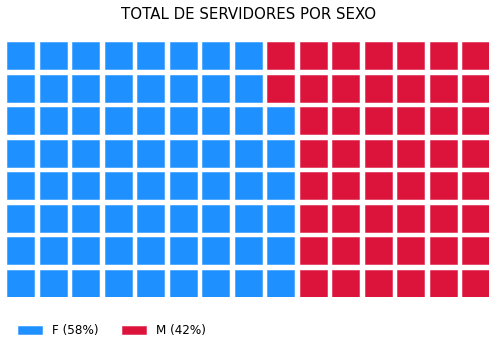

In [24]:
# ANÁLISE DOS DADOS TOTAIS POR SEXO

dd = dados['SEXO'].value_counts()
total = len(dados)

fig = plt.figure(
    FigureClass = Waffle,
    rows = 8,
    columns = 15,
    values = dd,
    title={
        'label': 'TOTAL DE SERVIDORES POR SEXO\n',
        'loc': 'center',
        'fontdict': { 'fontsize': 15 }
    },
    labels=["{0} ({1}%)".format(k, round(v / total * 100)) for k, v in dd.items()],
    legend={
#         'labels': ["{0} ({1}%)".format(k, v) for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(dd),
        'framealpha': 0,
        'fontsize': 12
    },
    colors = my_color_palette[0:2]
)

salvargraficos()

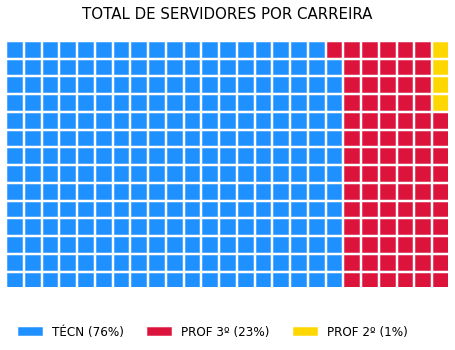

In [25]:
# ANÁLISE DOS DADOS TOTAIS POR CARREIRA

dd = dados['CARREIRA'].value_counts()
total = len(dados)

fig = plt.figure(
    FigureClass = Waffle,
    rows = 14,
    columns = 25,
    values = dd,
    title={ 'label': 'TOTAL DE SERVIDORES POR CARREIRA\n', 
           'loc': 'center',
            'fontdict': { 'fontsize': 15 }  },
    labels=["{0} ({1}%)".format(k, round(v / total * 100)) for k, v in dd.items()],
    legend={'loc': 'lower left', 
            'bbox_to_anchor': (0, -0.25), 
            'ncol': 3, 
            'framealpha': 0},
    colors = my_color_palette[0:3]
)
    

salvargraficos()

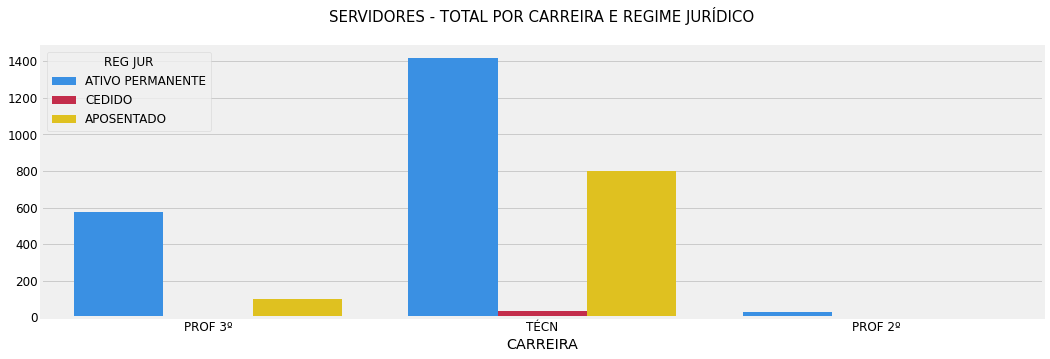

In [26]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
sn.countplot(x='CARREIRA', data=dados, hue='REG JUR', ax=ax)
ax.set_xlabel('CARREIRA')
ax.set_ylabel('')
ax.set_title('SERVIDORES - TOTAL POR CARREIRA E REGIME JURÍDICO\n', fontsize=15)

salvargraficos()

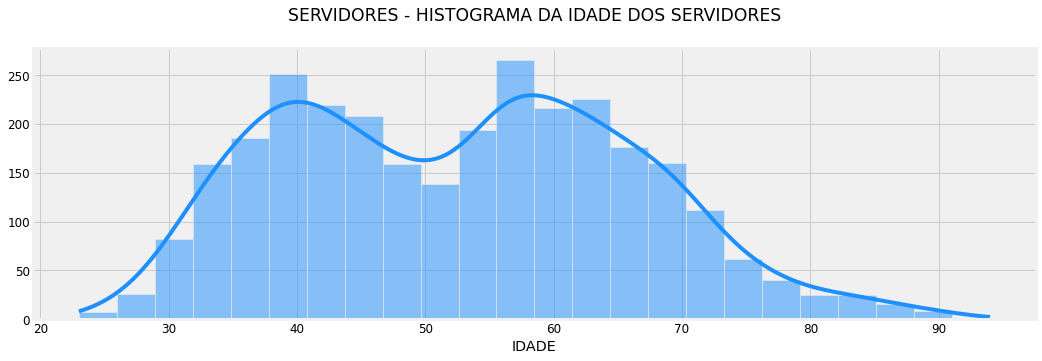

In [27]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
sn.histplot(dados['IDADE'], kde=True, ax=ax)
ax.set_xlabel('IDADE')
ax.set_ylabel('')
ax.set_title('SERVIDORES - HISTOGRAMA DA IDADE DOS SERVIDORES\n')

salvargraficos()

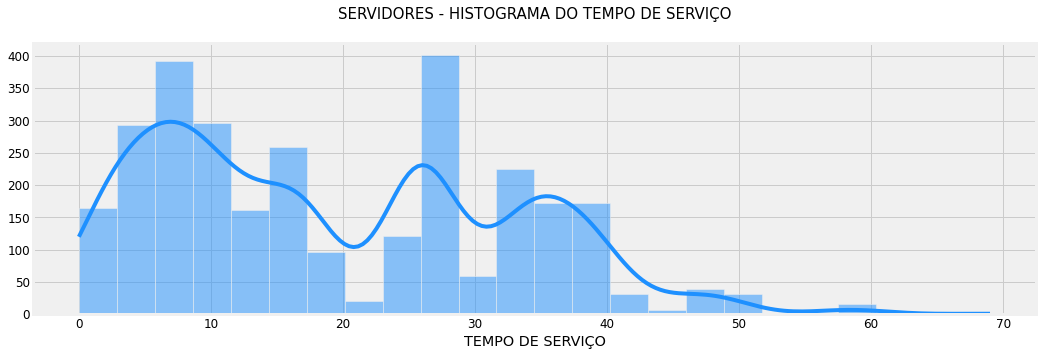

In [28]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
sn.histplot(dados['TEMPO SERVIÇO'],  kde=True, ax=ax)
ax.set_xlabel('TEMPO DE SERVIÇO')
ax.set_ylabel('')
ax.set_title('SERVIDORES - HISTOGRAMA DO TEMPO DE SERVIÇO\n', fontsize=15)

salvargraficos()

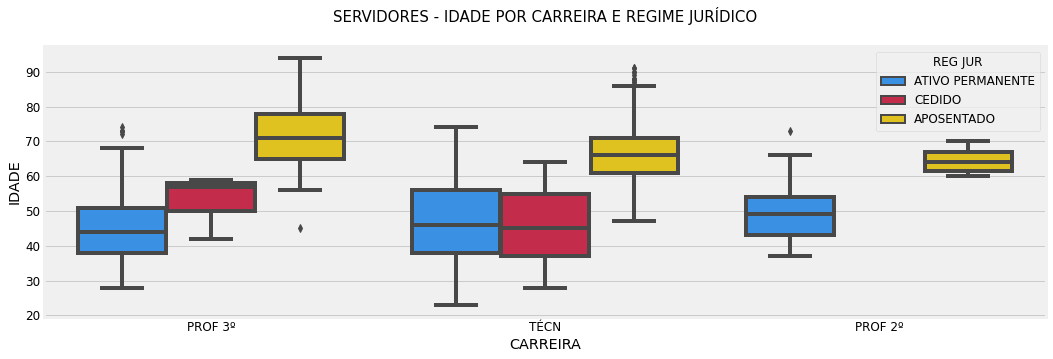

In [29]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.boxplot(x='CARREIRA', y= 'IDADE', data=dados, hue='REG JUR')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES - IDADE POR CARREIRA E REGIME JURÍDICO\n', fontsize=15)

salvargraficos()

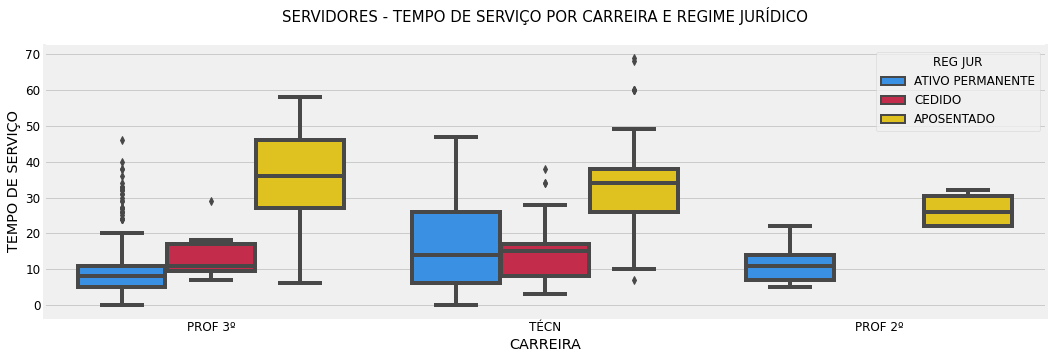

In [30]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.boxplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=dados, hue='REG JUR')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES - TEMPO DE SERVIÇO POR CARREIRA E REGIME JURÍDICO\n', fontsize=15)

salvargraficos()

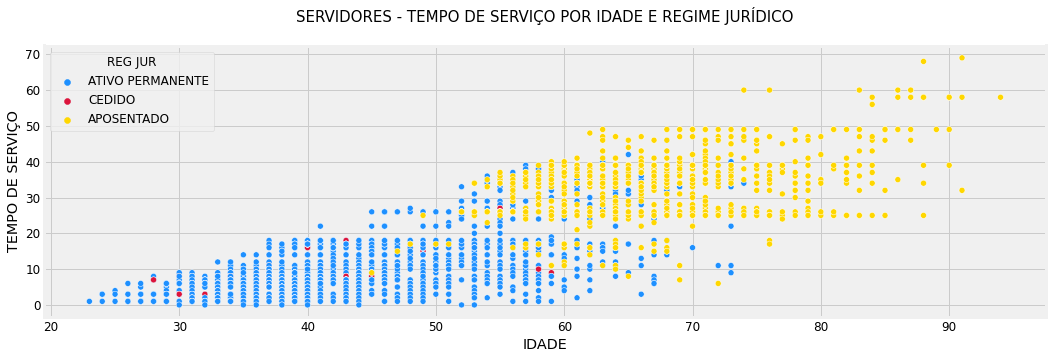

In [31]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=dados, hue='REG JUR')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES - TEMPO DE SERVIÇO POR IDADE E REGIME JURÍDICO\n', fontsize=15)

salvargraficos()

# ANÁLISE DOS SERVIDORES INATIVOS

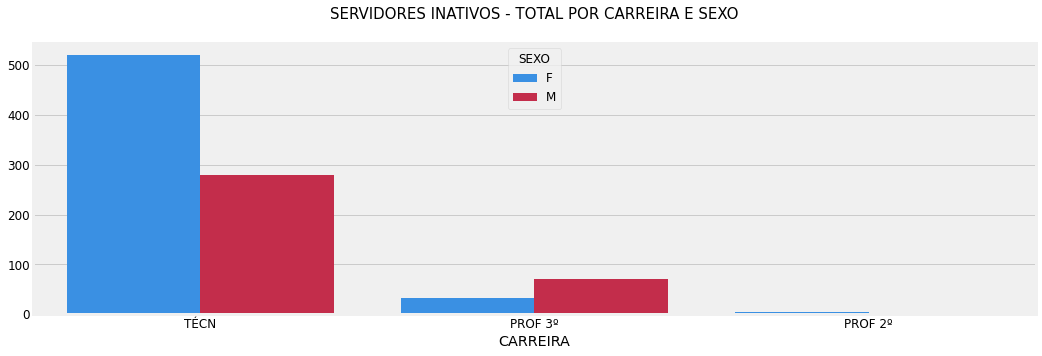

In [32]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.countplot(x='CARREIRA', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('')
ax.set_title('SERVIDORES INATIVOS - TOTAL POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

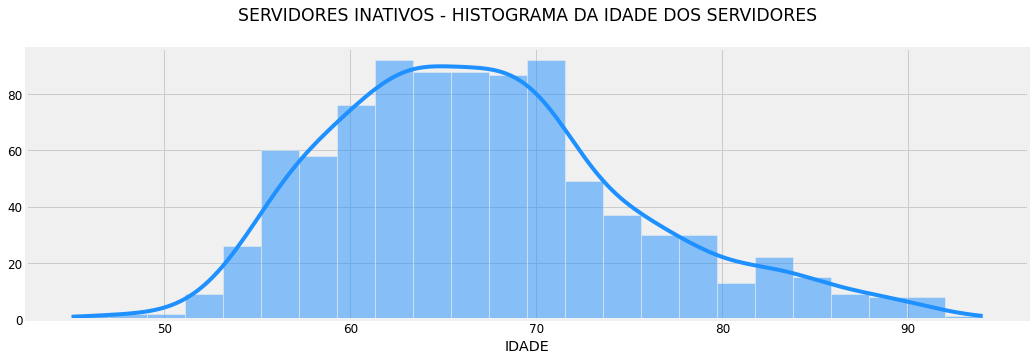

In [33]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.histplot(aposentados['IDADE'], kde=True)
ax.set_xlabel('IDADE')
ax.set_ylabel('')
ax.set_title('SERVIDORES INATIVOS - HISTOGRAMA DA IDADE DOS SERVIDORES\n')

salvargraficos()

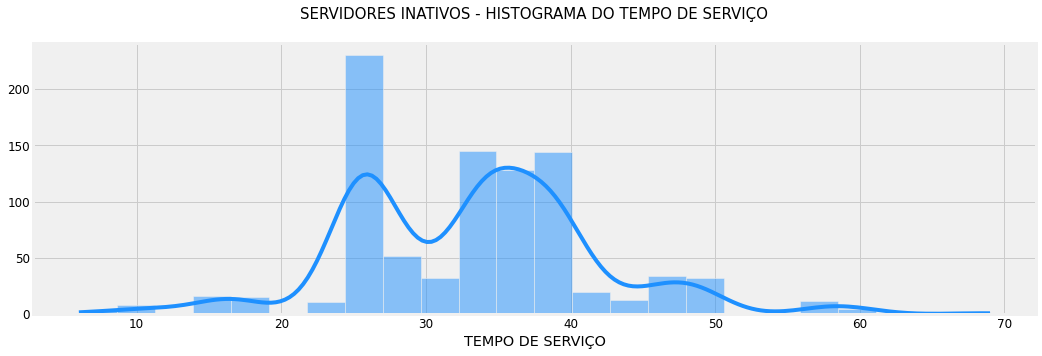

In [34]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
# ax = sn.distplot(aposentados['TEMPO SERVIÇO'])
ax = sn.histplot(aposentados['TEMPO SERVIÇO'],  kde=True)
ax.set_xlabel('TEMPO DE SERVIÇO')
ax.set_ylabel('')
ax.set_title('SERVIDORES INATIVOS - HISTOGRAMA DO TEMPO DE SERVIÇO\n', fontsize=15)

salvargraficos()

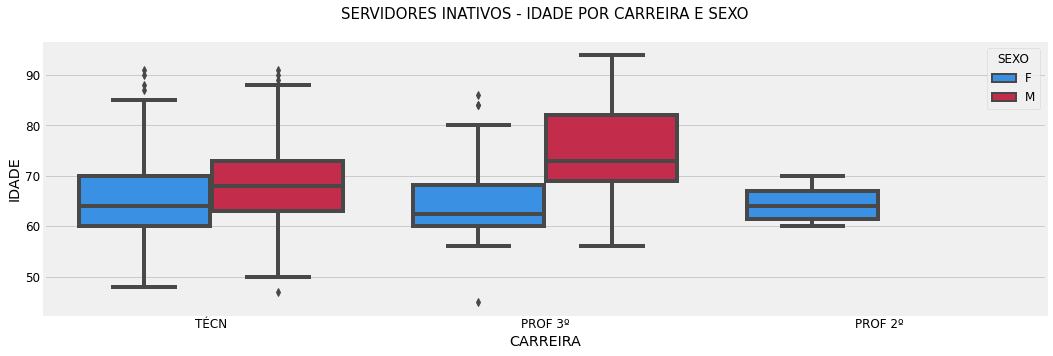

In [35]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.boxplot(x='CARREIRA', y= 'IDADE', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES INATIVOS - IDADE POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

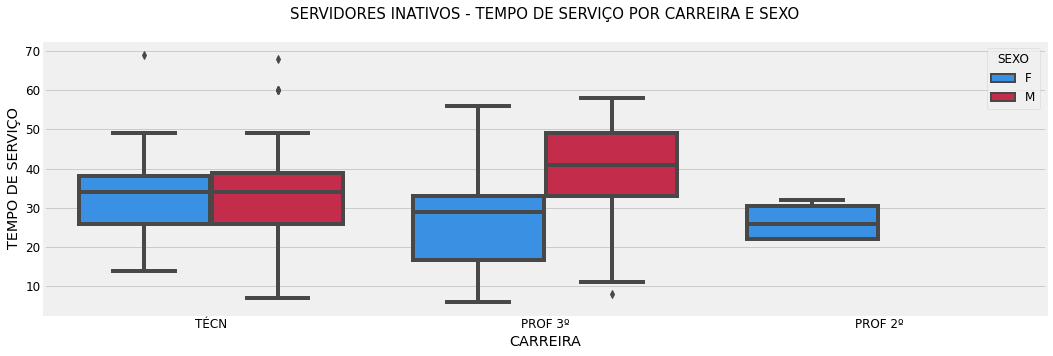

In [36]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.boxplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES INATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

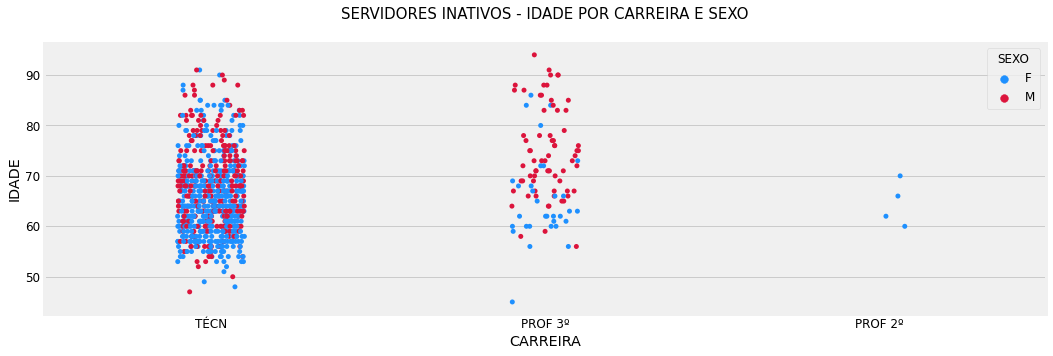

In [37]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.stripplot(x='CARREIRA', y= 'IDADE', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES INATIVOS - IDADE POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

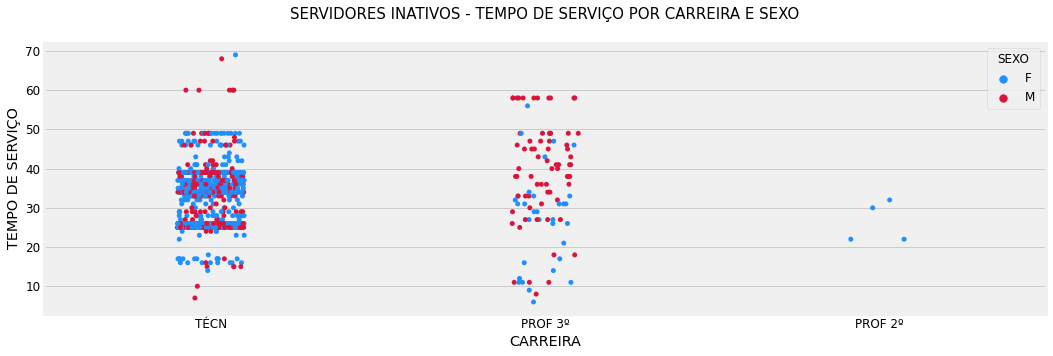

In [38]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.stripplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES INATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

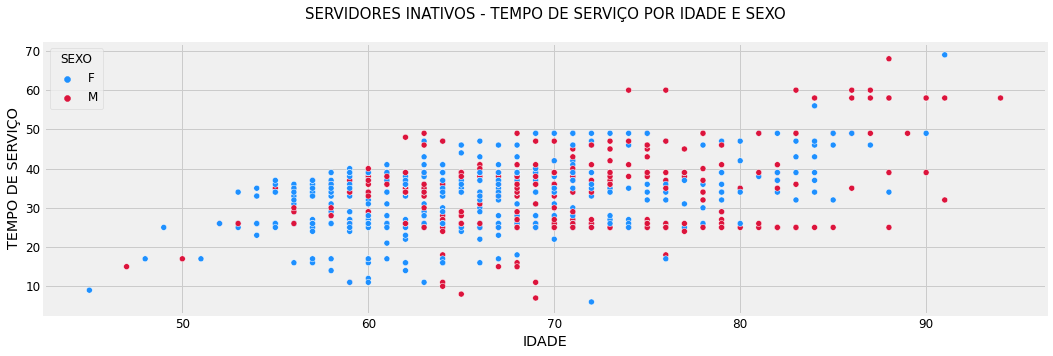

In [39]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=aposentados, hue='SEXO')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES INATIVOS - TEMPO DE SERVIÇO POR IDADE E SEXO\n', fontsize=15)

salvargraficos()

# ANÁLISE DOS SERVIDORES ATIVOS

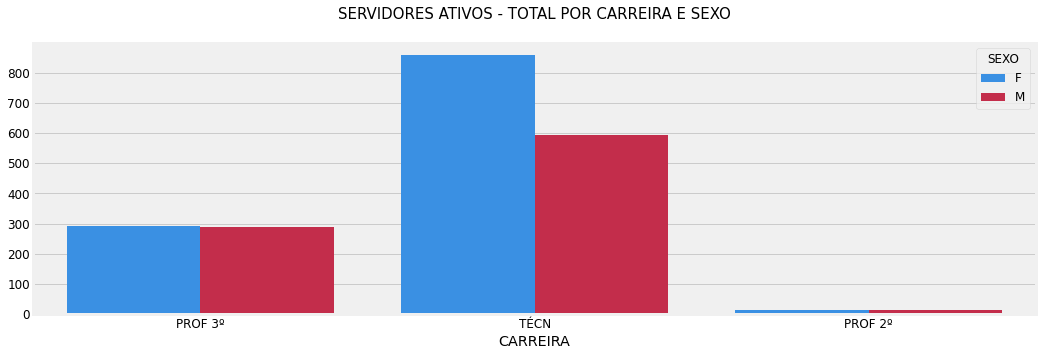

In [40]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.countplot(x='CARREIRA', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('')
ax.set_title('SERVIDORES ATIVOS - TOTAL POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

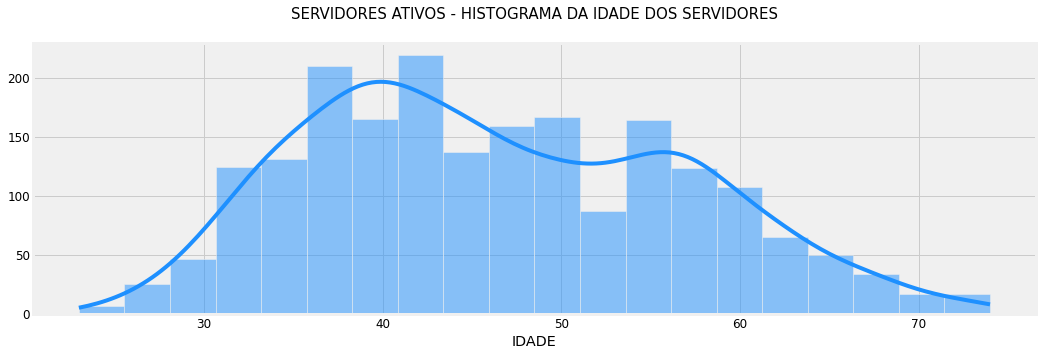

In [41]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.histplot(ativos['IDADE'], kde=True)
ax.set_xlabel('IDADE')
ax.set_ylabel('')
ax.set_title('SERVIDORES ATIVOS - HISTOGRAMA DA IDADE DOS SERVIDORES\n', fontsize=15)

salvargraficos()

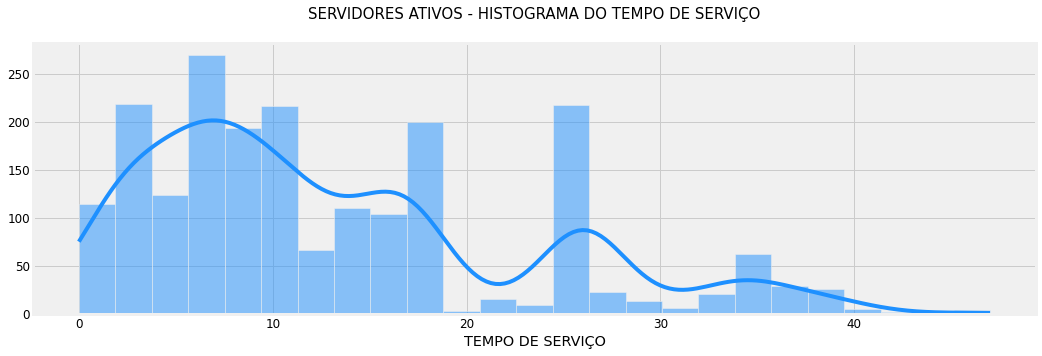

In [42]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.histplot(ativos['TEMPO SERVIÇO'], kde=True)
ax.set_xlabel('TEMPO DE SERVIÇO')
ax.set_ylabel('')
ax.set_title('SERVIDORES ATIVOS - HISTOGRAMA DO TEMPO DE SERVIÇO\n', fontsize=15)

salvargraficos()

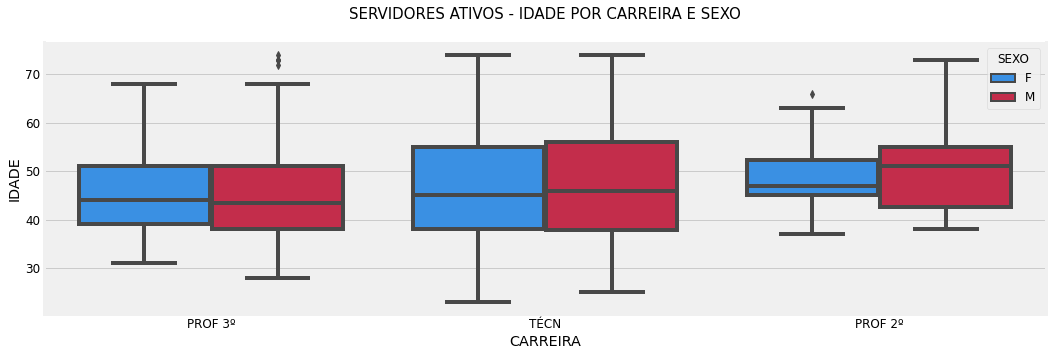

In [43]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.boxplot(x='CARREIRA', y= 'IDADE', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES ATIVOS - IDADE POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

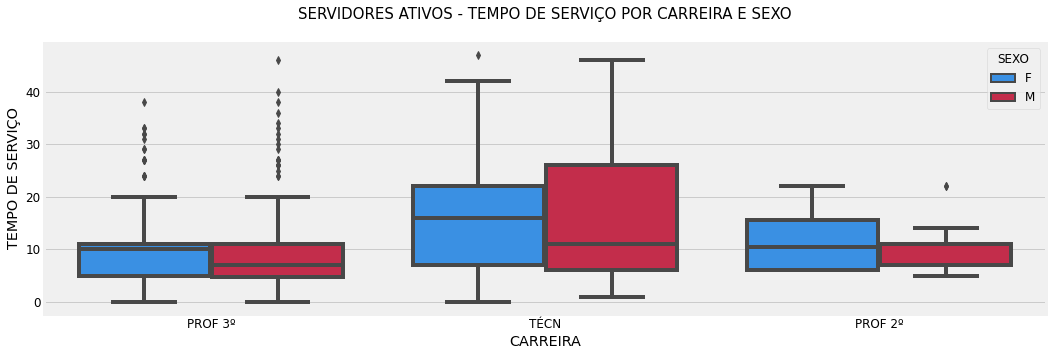

In [44]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.boxplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES ATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

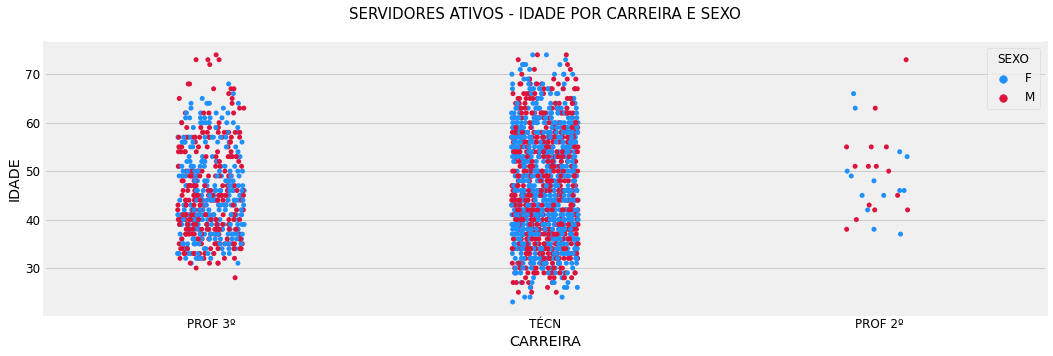

In [45]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.stripplot(x='CARREIRA', y= 'IDADE', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES ATIVOS - IDADE POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

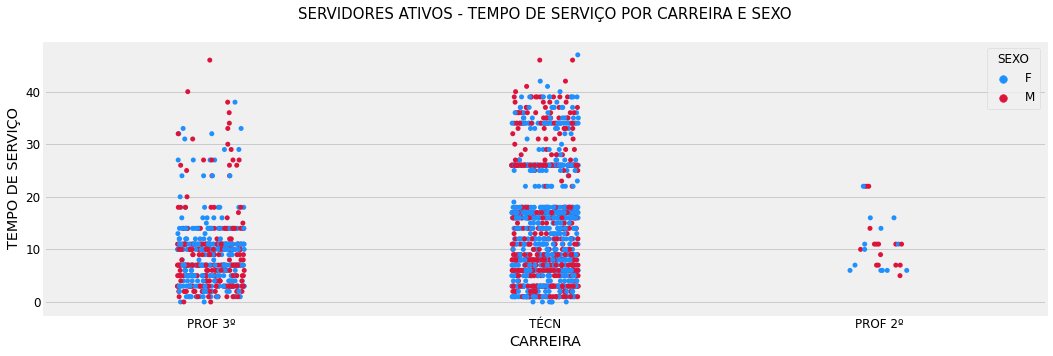

In [46]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.stripplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES ATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO\n', fontsize=15)

salvargraficos()

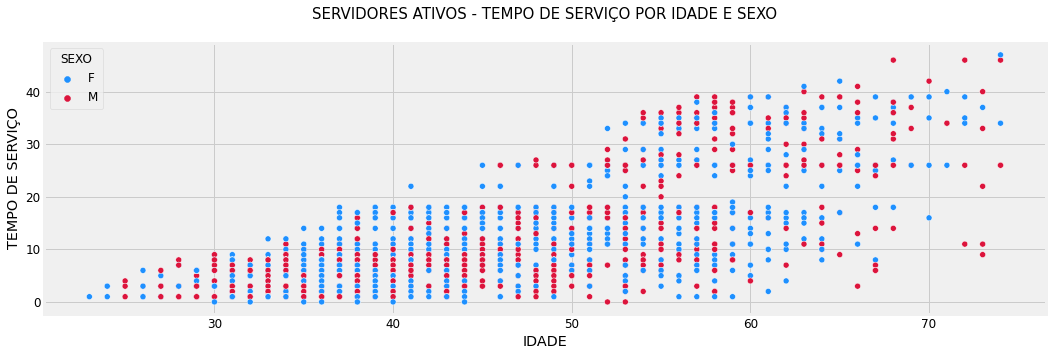

In [47]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=ativos, hue='SEXO')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES ATIVOS - TEMPO DE SERVIÇO POR IDADE E SEXO\n', fontsize=15)

salvargraficos()

# MODELO DE IA

In [48]:
# CRIANDO A FUNÇÃO PARA FAZER A PREVISÃO

def verificador_modelos(dados, cl_numericos, cl_categoricas):

    # SEPARA AS COLUNAS EM TARGET E FEATURES
    features = dados[cl_numericos + cl_categoricas]
    target = dados['REG JUR']
    
    # DIVIDE OS DADOS
    xt, x_, yt, y_ = train_test_split(features, target, test_size=0.3, random_state=42)

    # FAZ O TRATAMENTO NAS COLUNAS NUMÉRICAS
    tratar_numeros = Pipeline(steps=[('minmax', MinMaxScaler()) ])

    # FAZ O TRATAMENTO NAS COLUNAS TEXTO
    tratar_textos = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
                                   ('onehot', OneHotEncoder(handle_unknown='ignore')) ])
    
    # CRIA O OBJETO PARA TRATAR AS COLUNAS
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', tratar_textos, cl_categoricas), 
            ('num', tratar_numeros, cl_numericos)
        ], remainder='passthrough')

    # VARIÁVEL COM OS ESTIMADORES
    modelos = [('knn', KNeighborsClassifier()),
               ('RL', LogisticRegression()), 
               ('Árvore', DecisionTreeClassifier()),
               ('Floresta', RandomForestClassifier()) ]
    
    # VARIÁVEL COM OS PARAMETROS
    parametros = [{'knn__n_neighbors' : [3, 5, 7, 9, 11],
                   'knn__leaf_size': [20, 25, 30],
                   'knn__weights': ['uniform', 'distance']},
                                    
                  {'RL__max_iter': [100, 200, 300, 400, 500],
                   'RL__C': np.logspace(-3, 3, 7)},
                  
                  {'Árvore__max_depth': [3, 5, 7, 9], 
                   'Árvore__max_features': ['auto', 'sqrt'],
                   'Árvore__min_samples_leaf': [1, 3, 5],
                   'Árvore__min_samples_split': [2, 5, 10]},
                 
                  {'Floresta__bootstrap': [True, False],
                   'Floresta__n_estimators': [100, 200],
                   'Floresta__max_depth': [3, 4, 5, 7, None],
                   'Floresta__max_samples': [2, 3, 5, 7, None],
                   'Floresta__max_features': ['auto', 'sqrt']} ]

    # VARIÁVEIS PARA GUARDAR OS RESULTADOS
    std_score_menor = 100
    dic_resultados = {}
    
    # LOOP NOS ESTIMADORES
    a, b = zip(*modelos)
    for nome, modelo, parametro in zip(a, b, parametros):

        # CRIA A PIPELINE
        md = Pipeline(steps=[('preprocessor', preprocessor),
                          (nome, modelo)])  
        
        # CRIA O GRIDSERCH PARA VERIFICAÇÃO DO MELHOR PARAMETRO
        gridsearch = GridSearchCV(md, parametro, n_jobs=-1, verbose=1, cv=3)
        # TREINA O MODELO
        gridsearch.fit(xt, yt)
        
        # SELECIONA O MELHOR MODELO
        modelo_melhorparametro = gridsearch.best_estimator_
        
        # INFORMAÇÕES SOBRE OS ESTIMADORES
        score = gridsearch.best_score_
        print(nome, score)
        print(gridsearch.best_params_)
        print()

        # FAZ A VALIDAÇÃO CRUZADA
        scorelista = cross_val_score(modelo_melhorparametro, features, target, cv=10)
        score = modelo_melhorparametro.score(x_, y_)

        # FAZ A PREDIÇÃO
        yp = modelo_melhorparametro.predict(x_)
        
        # GUARDA AS MÉTRICAS DO MODELO
        class_report = classification_report(y_, yp)
        conf_matrix = confusion_matrix(y_, yp)
        
        # CALCULA A MÉDIA E O DESVIO DA VARIÁVEL ESCORE
        std_score = np.std(scorelista)
        mean_score = np.mean(scorelista)
        
        # SELECIONA O MELHOR ESTIMADOR
        if std_score < std_score_menor:
            std_score_menor = std_score
            modelo_final = modelo_melhorparametro
            nome_final = nome
            
        # GUARDA O RESULTADO PARA COMPARAÇÃO DOS ESTIMADORES
        dic_resultados[nome] = {'score': score, 
                                'cross_val': scorelista,
                                'cross_val_std': std_score,
                                'cross_val_mean': mean_score,
                                'class_report': class_report,
                                'conf_matrix': conf_matrix}


        
    return (dic_resultados, (nome_final, modelo_final, xt, yt))

# SIMULAÇÃO

In [49]:
# PRIMEIRA SIMULAÇÃO

# VARIÁVEIS ESCOLHIDA
col_numericos = ['IDADE', 'TEMPO SERVIÇO', 'x']
col_categoricas = ['SEXO', 'CARREIRA', 'CARGO', 'CLASSE', 'ESTADO CIVIL', 'TITULAÇÃO', 'CH']

# TREINANDO MODELO
dic_resultados, modelo_dados = verificador_modelos(dados_modelo, col_numericos, col_categoricas)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
knn 0.8519744638609815
{'knn__leaf_size': 20, 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}

Fitting 3 folds for each of 35 candidates, totalling 105 fits
RL 0.8939238042656896
{'RL__C': 1.0, 'RL__max_iter': 100}

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Árvore 0.8731878905498439
{'Árvore__max_depth': 7, 'Árvore__max_features': 'sqrt', 'Árvore__min_samples_leaf': 3, 'Árvore__min_samples_split': 5}

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Floresta 0.8871696098196186
{'Floresta__bootstrap': False, 'Floresta__max_depth': 7, 'Floresta__max_features': 'auto', 'Floresta__max_samples': 2, 'Floresta__n_estimators': 100}



In [50]:
# RECUPERAR OS VALORES DO TREINAMENTO
nome, md, xt, yt = modelo_dados

# FAZER A PERMUTATION IMPORTANCE
resultado = permutation_importance(md, xt, yt, n_repeats=5, random_state=42, n_jobs=-1)
dd = pd.DataFrame(resultado['importances'].T, columns=xt.columns)

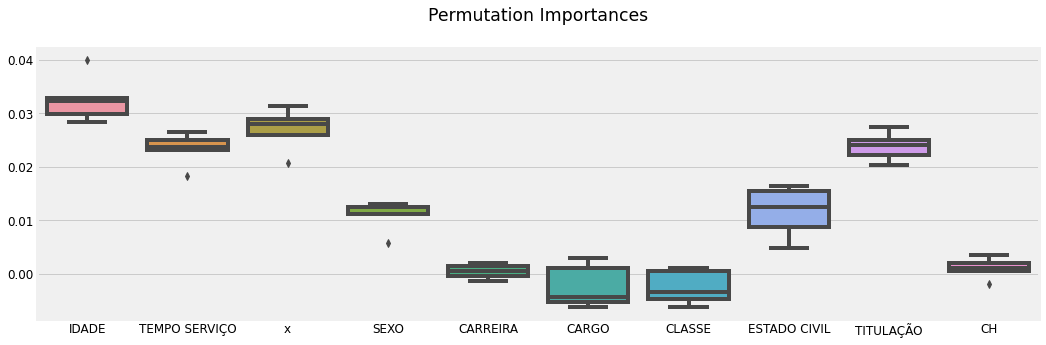

In [51]:
# PLOTAR O RESULTADO

fig, ax = plt.subplots()
plt.title('Permutation Importances\n')
sn.boxplot(data=dd, ax=ax)
plt.show()

salvargraficos()

In [52]:
# SEGUNDA SIMULAÇÃO

# VARIÁVEIS ESCOLHIDA
col_numericos = ['IDADE', 'TEMPO SERVIÇO', 'x']
col_categoricas = ['SEXO', 'CARREIRA']

# TREINANDO MODELO
dic_resultados, modelo_dados = verificador_modelos(dados_modelo, col_numericos, col_categoricas)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
knn 0.8842780422107527
{'knn__leaf_size': 25, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

Fitting 3 folds for each of 35 candidates, totalling 105 fits
RL 0.8905463584930388
{'RL__C': 1000.0, 'RL__max_iter': 100}

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Árvore 0.8900653600238687
{'Árvore__max_depth': 7, 'Árvore__max_features': 'sqrt', 'Árvore__min_samples_leaf': 5, 'Árvore__min_samples_split': 5}

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Floresta 0.8939224100672282
{'Floresta__bootstrap': False, 'Floresta__max_depth': 5, 'Floresta__max_features': 'sqrt', 'Floresta__max_samples': 7, 'Floresta__n_estimators': 100}



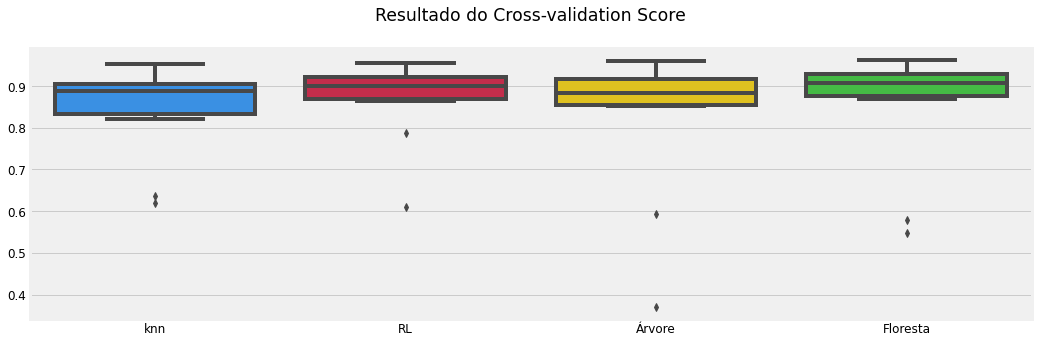

In [53]:
# AVALIAÇÃO DO CROSS-VALIDATION 

tb = {}
for vl in dic_resultados.keys():
    tb[vl] = dic_resultados[vl]['cross_val']

fig, ax = plt.subplots()
plt.title('Resultado do Cross-validation Score\n')
sn.boxplot(data=pd.DataFrame(tb), ax=ax)
plt.show()

salvargraficos()

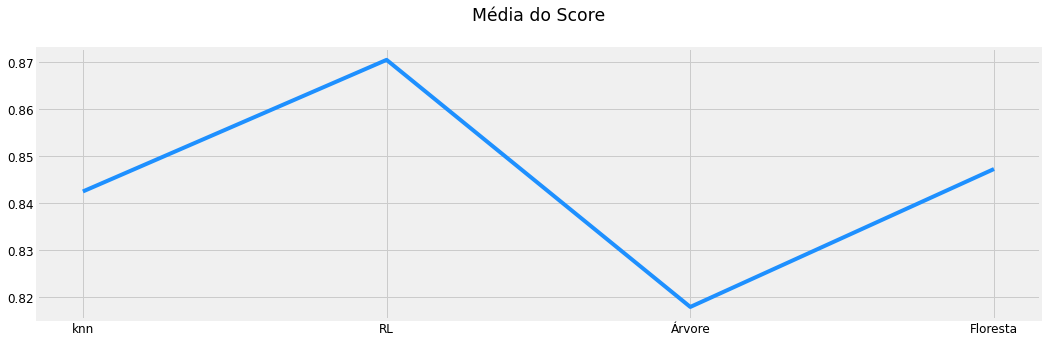

In [54]:
# AVALIAÇÃO DA MÉDIA DO CROSS-VALIDATION 

vstd, label = [], []
for vl in dic_resultados.keys():
    vstd.append(dic_resultados[vl]['cross_val_mean'])
    label.append(vl)

fig, ax = plt.subplots()
plt.title('Média do Score\n')
plt.plot(label, vstd)
plt.show()

salvargraficos()

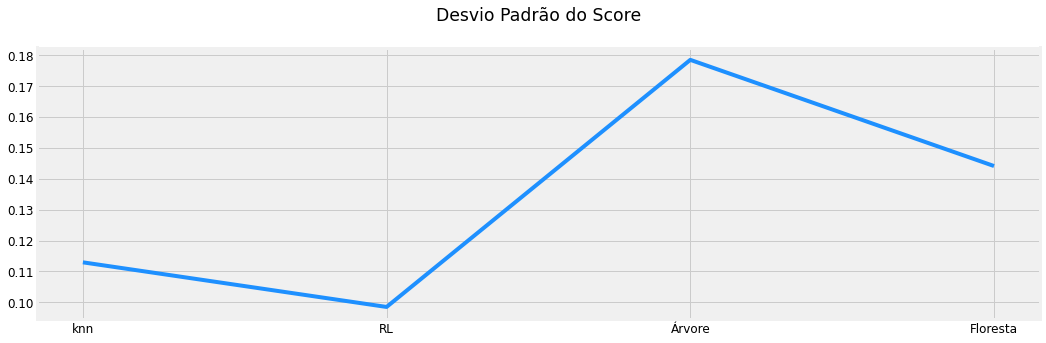

In [55]:
# AVALIAÇÃO DO DESVIO PADRÃO DO CROSS-VALIDATION 

vstd, label = [], []
for vl in dic_resultados.keys():
    vstd.append(dic_resultados[vl]['cross_val_std'])
    label.append(vl)

fig, ax = plt.subplots()
plt.title('Desvio Padrão do Score\n')
plt.plot(label, vstd)
plt.show()

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

In [56]:
# TERCEIRA SIMULAÇÃO

# VARIÁVEIS ESCOLHIDA
col_numericos = ['IDADE', 'TEMPO SERVIÇO', 'x']
col_categoricas = ['SEXO', 'CARREIRA', 'ESTADO CIVIL', 'TITULAÇÃO', 'CH']

# TREINANDO MODELO
dic_resultados, modelo_dados = verificador_modelos(dados_modelo, col_numericos, col_categoricas)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
knn 0.8693336289034072
{'knn__leaf_size': 20, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

Fitting 3 folds for each of 35 candidates, totalling 105 fits


C:\Users\tiago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tiago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RL 0.8924752320643338
{'RL__C': 1000.0, 'RL__max_iter': 100}



C:\Users\tiago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tiago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Árvore 0.8857245231144163
{'Árvore__max_depth': 7, 'Árvore__max_features': 'sqrt', 'Árvore__min_samples_leaf': 1, 'Árvore__min_samples_split': 5}

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Floresta 0.8944034085363982
{'Floresta__bootstrap': False, 'Floresta__max_depth': 7, 'Floresta__max_features': 'sqrt', 'Floresta__max_samples': 3, 'Floresta__n_estimators': 100}



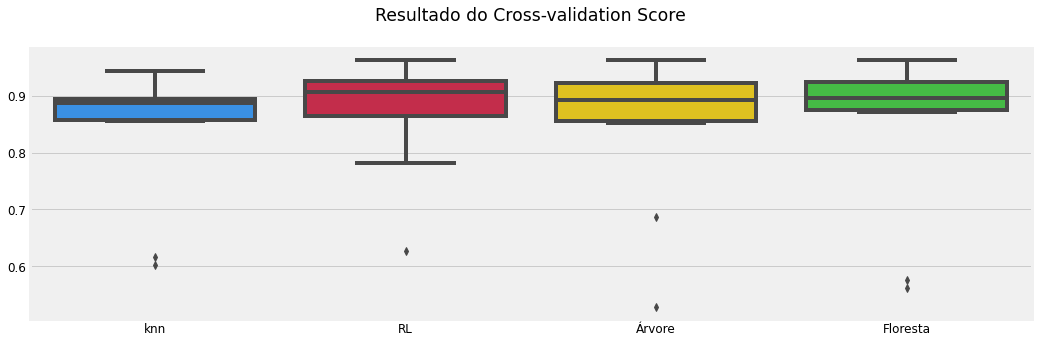

In [57]:
# AVALIAÇÃO DO CROSS-VALIDATION 

tb = {}
for vl in dic_resultados.keys():
    tb[vl] = dic_resultados[vl]['cross_val']

fig, ax = plt.subplots()
plt.title('Resultado do Cross-validation Score\n')
sn.boxplot(data=pd.DataFrame(tb), ax=ax)
plt.show()

salvargraficos()

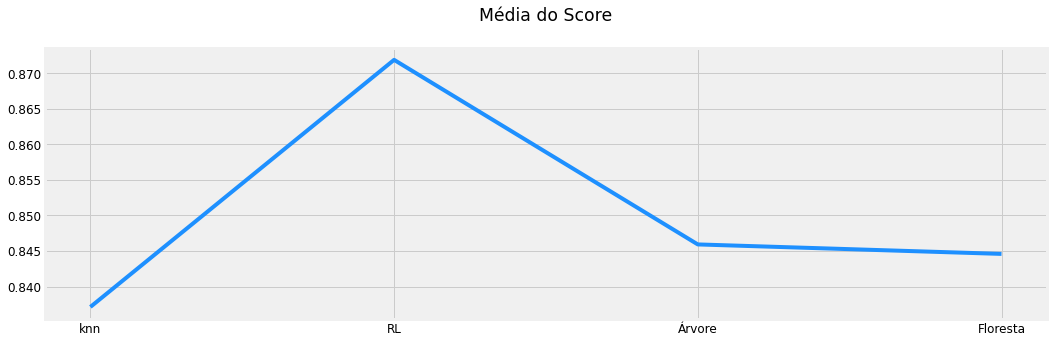

In [58]:
# AVALIAÇÃO DA MÉDIA DO CROSS-VALIDATION 

vstd, label = [], []
for vl in dic_resultados.keys():
    vstd.append(dic_resultados[vl]['cross_val_mean'])
    label.append(vl)

fig, ax = plt.subplots()
plt.title('Média do Score\n')
plt.plot(label, vstd)
plt.show()

salvargraficos()

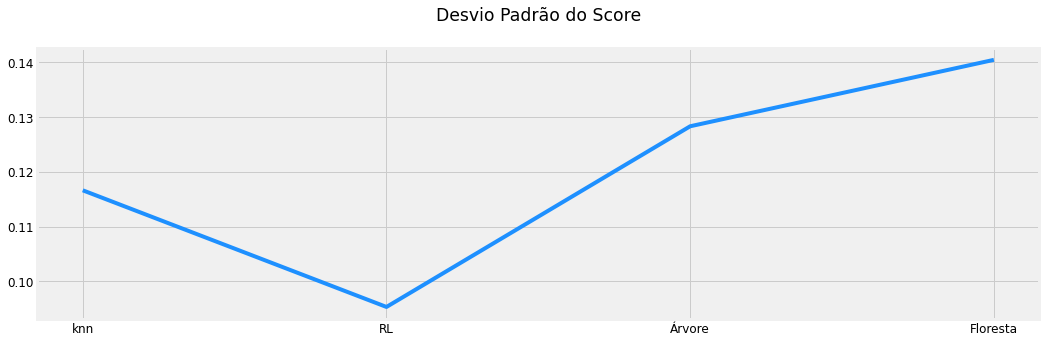

In [59]:
# AVALIAÇÃO DO DESVIO PADRÃO DO CROSS-VALIDATION 

vstd, label = [], []
for vl in dic_resultados.keys():
    vstd.append(dic_resultados[vl]['cross_val_std'])
    label.append(vl)

fig, ax = plt.subplots()
plt.title('Desvio Padrão do Score\n')
plt.plot(label, vstd)
plt.show()

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

In [60]:
# RETORNO DAS TREINAMENTO

nome, md, _, _ = modelo_dados

------------------------------------------------------------
                             RL                             
------------------------------------------------------------
                  precision    recall  f1-score   support

      APOSENTADO       0.81      0.80      0.81       282
ATIVO PERMANENTE       0.91      0.91      0.91       607

        accuracy                           0.88       889
       macro avg       0.86      0.86      0.86       889
    weighted avg       0.88      0.88      0.88       889

------------------------------------------------------------


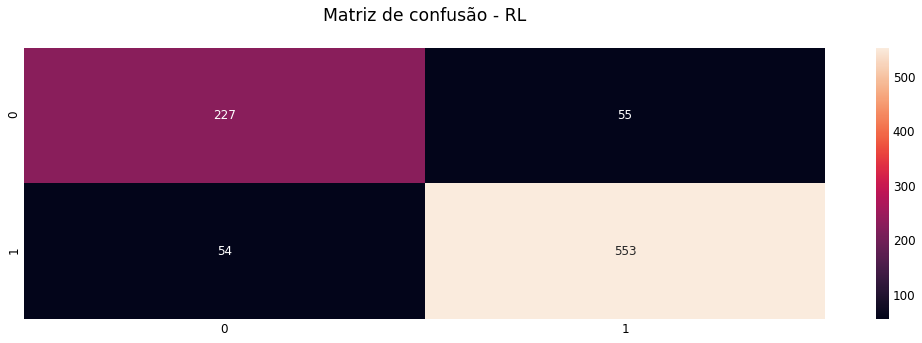

In [61]:
# VALIDAÇÃO DAS MÉTRICAS DO MELHOR MODELO

linha = '-' * 60
print(linha)
print(nome.center(60))
print(linha)
print(dic_resultados[nome]['class_report'])
print(linha)
fig, ax = plt.subplots()
plt.title('Matriz de confusão - {0}\n'.format(nome))
sn.heatmap(dic_resultados[nome]['conf_matrix'], annot=True, fmt='.0f', ax=ax)
plt.show()

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

# SIMULANDO UMA PREVISÃO FUTURA

In [62]:
# FAZER UMA CÓPIA DO DATASET
dadosatual = ativos[col_numericos + col_categoricas].copy()

# SIMULAR O PRÓXIMO ANO
dadosatual['IDADE'] += 1
dadosatual['TEMPO SERVIÇO'] += 1

In [63]:
# FAZENDO A PREDIÇÃO DA SIMULAÇÃO

predicao = md.predict(dadosatual)

ativos['PREVISAO'] = predicao

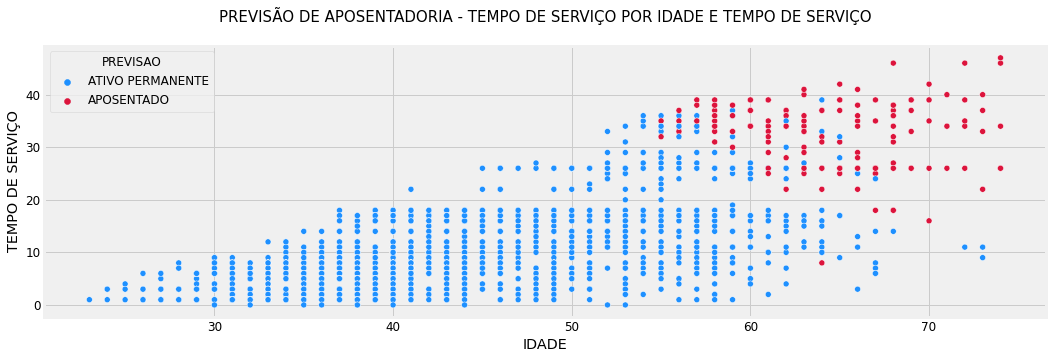

In [64]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=ativos, hue='PREVISAO')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('PREVISÃO DE APOSENTADORIA - TEMPO DE SERVIÇO POR IDADE E TEMPO DE SERVIÇO\n', fontsize=15)

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

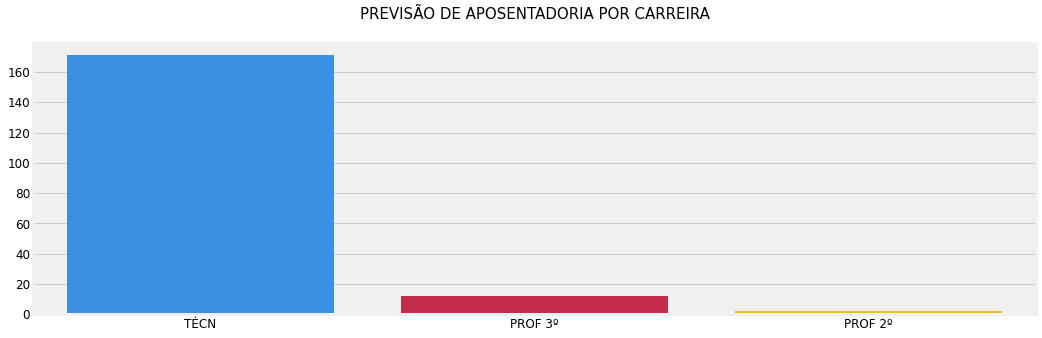

In [65]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
sn.countplot(x='CARREIRA', data=ativos[ativos['PREVISAO'] == 'APOSENTADO'], order=ativos['CARREIRA'].value_counts().index, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('PREVISÃO DE APOSENTADORIA POR CARREIRA\n', fontsize=15)

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

In [66]:
# CRIANDO O TOTAL DE PREVISÃO DE APOSENTADOS

ddtemp = ativos[ativos['PREVISAO'] == 'APOSENTADO']['CARGO'].value_counts().reset_index().iloc[0:20]

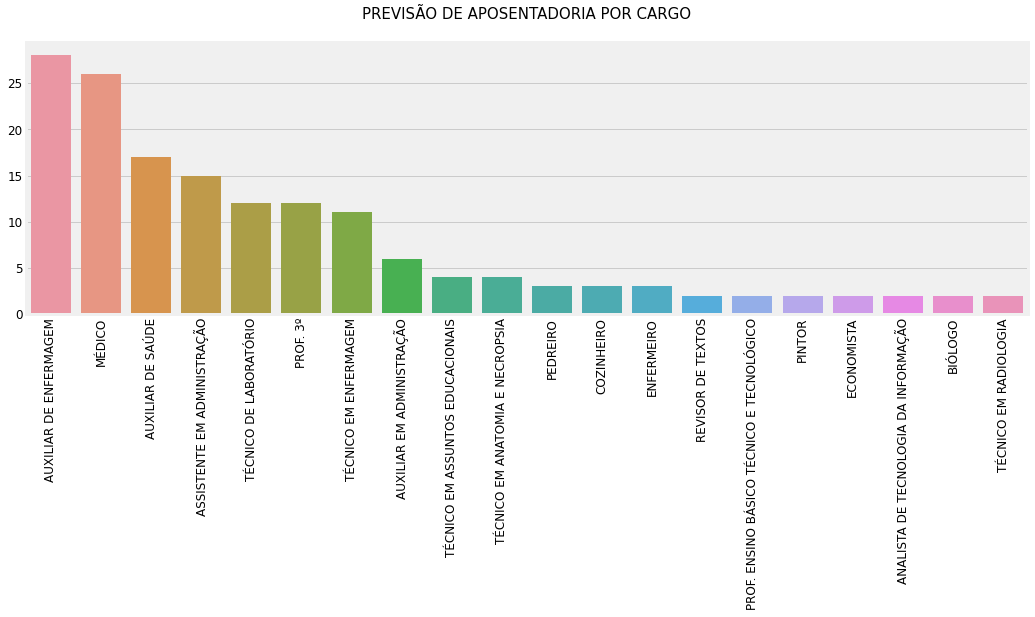

In [67]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
sn.barplot(x='index', y='CARGO', data=ddtemp, orient='v', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('PREVISÃO DE APOSENTADORIA POR CARGO\n', fontsize=15)
plt.xticks(rotation=90)

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

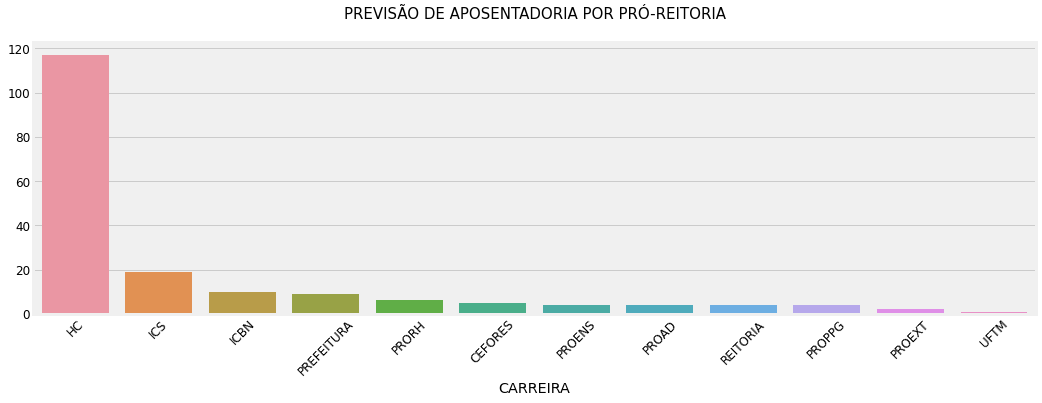

In [68]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots()
sn.countplot(x='GRUPO', data=ativos[ativos['PREVISAO'] == 'APOSENTADO'], order=ativos[ativos['PREVISAO'] == 'APOSENTADO']['GRUPO'].value_counts().index, ax=ax)
ax.set_xlabel('CARREIRA')
ax.set_ylabel('')
ax.set_title('PREVISÃO DE APOSENTADORIA POR PRÓ-REITORIA\n', fontsize=15)
plt.xticks(rotation=45)

salvargraficos()

<font color='blue'>

**ANÁLISE** 

* Tipos das variáveis discreto  
IDADE - TEMPO SERVIÇO  

    
* Tipos das variáveis contínuo

    
* Tipos das variáveis nominal  
SEXO - CARREIRA - CARGO - CD CLASSE - CD NÍVEL - ESTADO CIVIL - TITULAÇÃO - CH   
    
* Tipos das variáveis ordinal
    
</font>

----

# CONCLUSÃO

# FIM